In [1]:
!pip install numpy pandas scikit-fuzzy matplotlib requests

In [2]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('./data.csv')

percentage = 0.3
data[:int(len(data) * percentage)]

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,519248.0,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1228454.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ..."
2,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,212748.0,"AD, AE, AG, AO, BH, BM, BR, BS, BZ, CI, CM, CO..."
3,Unforgiven,movie,"Drama, Western",1992.0,8.2,446602.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,8.3,1113480.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."
...,...,...,...,...,...,...,...
5681,Facet (nie)potrzebny od zaraz,movie,"Comedy, Drama, Music",2014.0,4.4,398.0,"AT, BE, BG, BM, CH, CY, CZ, DE, DK, EE, ES, FI..."
5682,The Smile of a Child,movie,"Comedy, Drama, Music",1969.0,4.8,44.0,"AL, AT, BA, BE, BG, CH, CZ, DE, DK, EE, FI, FR..."
5683,Kundo: Age of the Rampant,movie,"Action, Drama",2014.0,6.8,3954.0,KR
5684,The Mummy,movie,"Action, Adventure, Fantasy",2017.0,5.4,211329.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."


In [4]:
min_year = data['releaseYear'].min()
max_year = data['releaseYear'].max()
max_votes = data['imdbNumVotes'].max()

print(f"Release Year Range: {min_year} - {max_year}")
print(f"Number of Votes Range: 0 - {max_votes}")

imdb_rating = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'imdb_rating')
release_year = ctrl.Antecedent(np.arange(min_year, max_year + 1, 1), 'release_year')
num_votes = ctrl.Antecedent(np.arange(0, max_votes + 1, 10000), 'num_votes')
movie_quality = ctrl.Consequent(np.arange(0, 11, 1), 'movie_quality')

Release Year Range: 1913.0 - 2024.0
Number of Votes Range: 0 - 2981119.0


In [5]:
# IMDb Rating Membership Functions
imdb_rating['low'] = fuzz.trapmf(imdb_rating.universe, [0, 0, 3, 5])
imdb_rating['medium'] = fuzz.trimf(imdb_rating.universe, [4, 5.5, 7])
imdb_rating['high'] = fuzz.trapmf(imdb_rating.universe, [6, 8, 10, 10])

# Release Year Membership Functions
release_year['classic'] = fuzz.trapmf(release_year.universe, [min_year, min_year, 1970, 1990])
release_year['modern'] = fuzz.trimf(release_year.universe, [1985, 2000, 2010])
release_year['contemporary'] = fuzz.trapmf(release_year.universe, [2000, 2020, max_year, max_year])

# Number of Votes Membership Functions
num_votes['few'] = fuzz.trapmf(num_votes.universe, [0, 0, 50000, 150000])
num_votes['average'] = fuzz.trimf(num_votes.universe, [100000, 200000, 400000])
num_votes['many'] = fuzz.trapmf(num_votes.universe, [300000, 500000, max_votes, max_votes])

# Movie Quality Membership Functions
movie_quality['low'] = fuzz.trapmf(movie_quality.universe, [0, 0, 3, 5])
movie_quality['medium'] = fuzz.trimf(movie_quality.universe, [4, 5.5, 7])
movie_quality['high'] = fuzz.trapmf(movie_quality.universe, [6, 8, 10, 10])

C:\Users\Jimm\ai_env\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


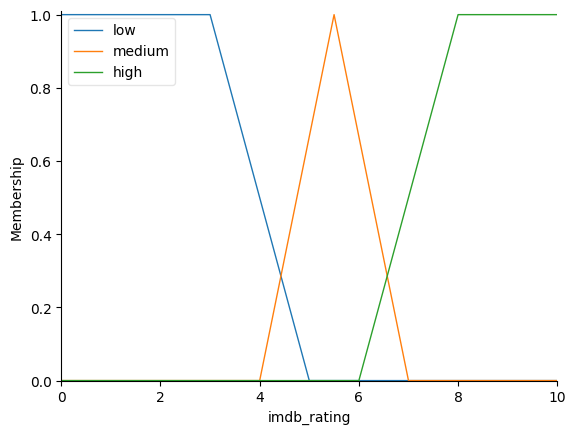

In [6]:
imdb_rating.view()
plt.show()

C:\Users\Jimm\ai_env\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


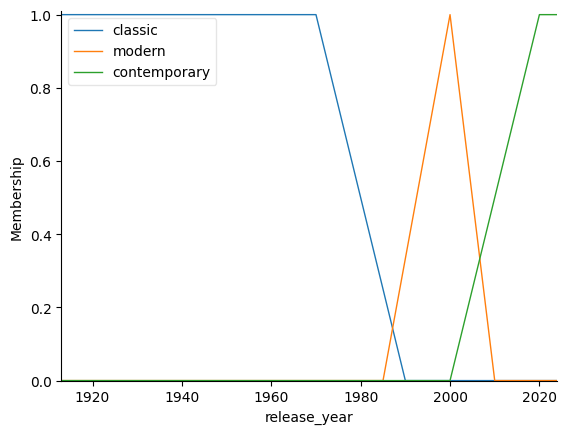

In [7]:
release_year.view()
plt.show()

C:\Users\Jimm\ai_env\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


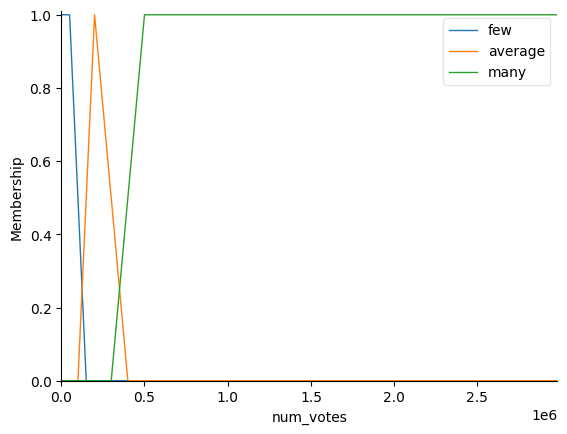

In [8]:
num_votes.view()
plt.show()

C:\Users\Jimm\ai_env\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


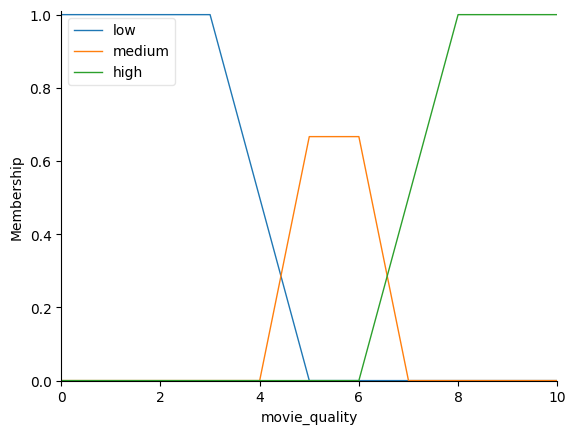

In [9]:
movie_quality.view()
plt.show()

In [10]:
# In [10]: # Rule definitions
rule1 = ctrl.Rule(imdb_rating['high'] & num_votes['many'], movie_quality['high'])
rule2 = ctrl.Rule(imdb_rating['medium'] & num_votes['average'], movie_quality['medium'])
rule3 = ctrl.Rule(imdb_rating['low'] & num_votes['few'], movie_quality['low'])
rule4 = ctrl.Rule(imdb_rating['high'] & release_year['classic'], movie_quality['high'])
rule5 = ctrl.Rule(imdb_rating['medium'] & release_year['modern'], movie_quality['medium'])
rule6 = ctrl.Rule(imdb_rating['low'] & num_votes['few'], movie_quality['low'])
rule7 = ctrl.Rule(imdb_rating['high'], movie_quality['high'])
rule8 = ctrl.Rule(imdb_rating['medium'], movie_quality['medium'])
rule9 = ctrl.Rule(imdb_rating['low'], movie_quality['low'])

In [14]:
# In [11]: # Build the control system with all the rules
movie_quality_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9
])

In [15]:
# Function to compute movie quality
def compute_movie_quality(row):
    # Create a new simulation instance for each row
    movie_quality_simulation = ctrl.ControlSystemSimulation(movie_quality_ctrl)

    # Initialize variables
    imdb_rating_value = None
    release_year_value = None
    num_votes_value = None

    try:
        # Set input values
        imdb_rating_value = row['imdbAverageRating']
        release_year_value = row['releaseYear']
        num_votes_value = row['imdbNumVotes']

        # Clip inputs to universes
        imdb_rating_value = np.clip(imdb_rating_value, imdb_rating.universe[0], imdb_rating.universe[-1])
        release_year_value = np.clip(release_year_value, release_year.universe[0], release_year.universe[-1])
        num_votes_value = np.clip(num_votes_value, num_votes.universe[0], num_votes.universe[-1])

        # Set inputs
        movie_quality_simulation.input['imdb_rating'] = imdb_rating_value
        movie_quality_simulation.input['release_year'] = release_year_value
        movie_quality_simulation.input['num_votes'] = num_votes_value

        # Compute the fuzzy result
        movie_quality_simulation.compute()

        return movie_quality_simulation.output['movie_quality']

    except Exception as ex:
        print(f"Error computing for row {row.name}: {ex}")
        print(f"Inputs: imdb_rating={imdb_rating_value}, release_year={release_year_value}, num_votes={num_votes_value}")
        return np.nan

# Apply the fuzzy logic model to the dataset
data['movie_quality_score'] = data.apply(compute_movie_quality, axis=1)

In [16]:
data.head()

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries,movie_quality_score
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,519248.0,"AT, CH, DE",8.366667
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1228454.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ...",8.444444
2,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,212748.0,"AD, AE, AG, AO, BH, BM, BR, BS, BZ, CI, CM, CO...",8.238095
3,Unforgiven,movie,"Drama, Western",1992.0,8.2,446602.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO...",8.444444
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,8.3,1113480.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG...",8.444444


In [14]:
def compute_movie_quality(row):
    # Create a new simulation instance for each row
    movie_quality_simulation = ctrl.ControlSystemSimulation(movie_quality_ctrl)

    # Initialize variables
    imdb_rating_value = None
    release_year_value = None
    num_votes_value = None

    try:
        # Set input values
        imdb_rating_value = row['imdbAverageRating']
        release_year_value = row['releaseYear']
        num_votes_value = row['imdbNumVotes']

        # Clip inputs to universes
        imdb_rating_value = np.clip(imdb_rating_value, imdb_rating.universe[0], imdb_rating.universe[-1])
        release_year_value = np.clip(release_year_value, release_year.universe[0], release_year.universe[-1])
        num_votes_value = np.clip(num_votes_value, num_votes.universe[0], num_votes.universe[-1])

        # Set inputs
        movie_quality_simulation.input['imdb_rating'] = imdb_rating_value
        movie_quality_simulation.input['release_year'] = release_year_value
        movie_quality_simulation.input['num_votes'] = num_votes_value

        # Compute the fuzzy result
        movie_quality_simulation.compute()

        return movie_quality_simulation.output['movie_quality']

    except Exception as ex:
        print(f"Error computing for row {row.name}: {ex}")
        print(f"Inputs: imdb_rating={imdb_rating_value}, release_year={release_year_value}, num_votes={num_votes_value}")
        return np.nan

# Apply the fuzzy logic model to the dataset
data['movie_quality_score'] = data.apply(compute_movie_quality, axis=1)

In [15]:
# Define a function to classify the movies
def classify_movie(score):
    if score >= 6.0:
        return 'High'
    elif score >= 4.0:
        return 'Medium'
    else:
        return 'Low'

# Apply the classification
data['movie_quality_category'] = data['movie_quality_score'].apply(classify_movie)

In [16]:
# Display the top 10 movies with the highest quality scores
top_movies = data.sort_values(by='movie_quality_score', ascending=False)
# save the top movies to a csv file
top_movies.to_csv('./top-movies.csv', index=False)


top_movies[['title', 'imdbAverageRating', 'releaseYear', 'imdbNumVotes', 'movie_quality_score', 'movie_quality_category']].head(10)

,title,imdbAverageRating,releaseYear,imdbNumVotes,movie_quality_score,movie_quality_category
18909,The Amazing Digital Circus,8.0,2023.0,5652.0,8.444444,High
18,Nausicaä of the Valley of the Wind,8.0,1984.0,187698.0,8.444444,High
18954,Das Boot - Die komplette TV-Serie,8.7,1985.0,161.0,8.444444,High
18894,Miniseries,8.6,2022.0,64.0,8.444444,High
1,Kill Bill: Vol. 1,8.2,2003.0,1228454.0,8.444444,High
17,Before Sunset,8.1,2004.0,296809.0,8.444444,High
3,Unforgiven,8.2,1992.0,446602.0,8.444444,High
4,Eternal Sunshine of the Spotless Mind,8.3,2004.0,1113480.0,8.444444,High
5,Amores Perros,8.0,2000.0,257839.0,8.444444,High
32,Scarface,8.3,1983.0,945439.0,8.444444,High


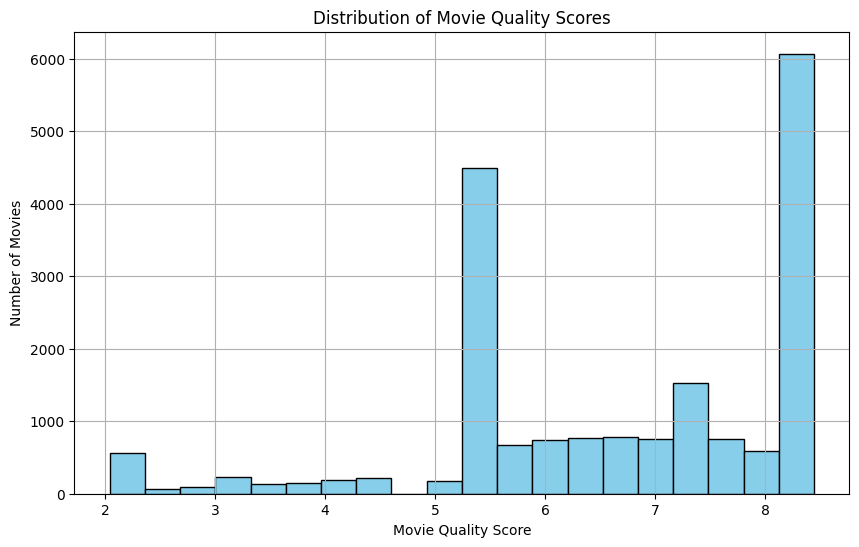

In [17]:
# Plot the distribution of movie quality scores
plt.figure(figsize=(10,6))
plt.hist(data['movie_quality_score'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Quality Scores')
plt.xlabel('Movie Quality Score')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

Movie Quality Category Counts:
movie_quality_category
High      11988
Medium     5736
Low        1231
Name: count, dtype: int64


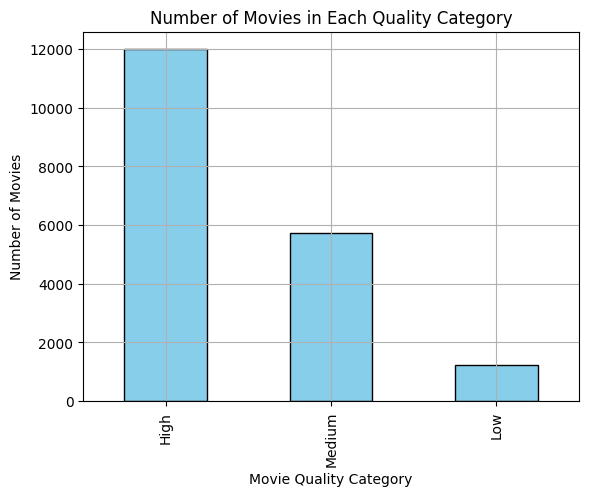

In [18]:
# Count the number of movies in each category
category_counts = data['movie_quality_category'].value_counts()
print("Movie Quality Category Counts:")
print(category_counts)

# Plot the counts
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Movies in Each Quality Category')
plt.xlabel('Movie Quality Category')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()